In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [2]:
# --- Load Production Data ---
df = pd.read_csv('production_data.csv')
df['Yield_%'] = (df['Total_Chips_Produced'] - df['Defective_Chips']) / df['Total_Chips_Produced'] * 100


In [3]:
# Select only available features
candidate_features = ['Line_ID', 'Operator_ID', 'Shift', 'Defective_Chips']
available_features = [col for col in candidate_features if col in df.columns]

if not available_features:
    raise ValueError("None of the expected features were found in the production dataset.")

X = pd.get_dummies(df[available_features])
y = df['Yield_%']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

preds = model.predict(X)
rmse = mean_squared_error(y, preds, squared=False)
print(f"Yield Prediction RMSE (All Data): {rmse:.2f}")


Yield Prediction RMSE (All Data): 0.61


C:\Users\conta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


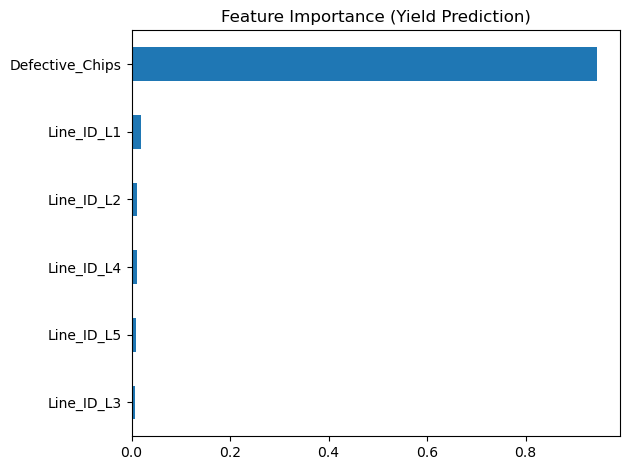

In [4]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()
importances.plot(kind='barh', title='Feature Importance (Yield Prediction)')
plt.tight_layout()
plt.show()

In [5]:
# --- Absenteeism Prediction ---
df_workforce = pd.read_csv('workforce_schedule.csv')
df_workforce['Absent'] = 1 - df_workforce['Present']

Absenteeism Prediction Accuracy (All Data): 92.00%


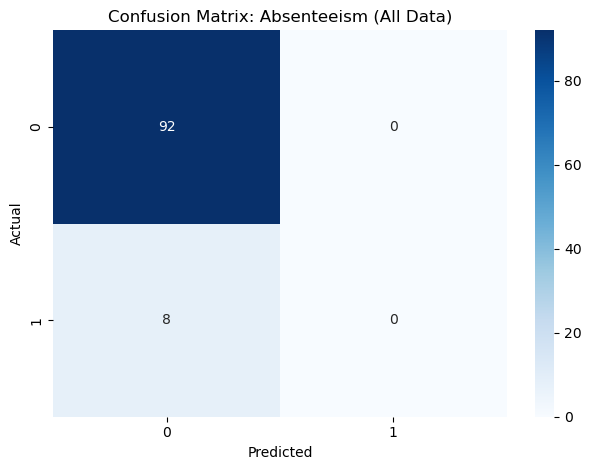

In [6]:
# Only use columns that exist
workforce_features = ['Shift', 'Department']
available_workforce_features = [f for f in workforce_features if f in df_workforce.columns]

X2 = pd.get_dummies(df_workforce[available_workforce_features])
y2 = df_workforce['Absent']

clf = LogisticRegression(max_iter=1000)
clf.fit(X2, y2)

preds2 = clf.predict(X2)
acc = accuracy_score(y2, preds2)
print(f"Absenteeism Prediction Accuracy (All Data): {acc:.2%}")

sns.heatmap(confusion_matrix(y2, preds2), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Absenteeism (All Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()